### Student Information
Name: 陳政修

Student ID: 110062515

GitHub ID: yuoriyurica

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Part 1

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [3]:
### ** >>> Exercise 2 (take home):** 
print(type(X[0:5]), X[0:5])
print(type(X['category']), X['category'])
print(type(X[['category']]), X[['category']])
print(type(X['category'].loc[0]), X['category'].loc[0])
print(type(X[['category']].loc[0]), X[['category']].loc[0])

<class 'pandas.core.frame.DataFrame'>                                                 text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
<class 'pandas.core.series.Series'> 0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 2257, dtype: int64
<class 'pandas.core.frame.DataFrame'>       category
0            1
1            1
2            3
3            3
4            3
...        ...
2252         2
2253         2
2254         2
2255         2
2256 

In [4]:
### >>> **Exercise 5 (take home)** 
'''
'Nan', 'None', '' are treated as string objects and does not evaluate to null
'''

"\n'Nan', 'None', '' are treated as string objects and does not evaluate to null\n"

In [5]:
X_sample = X.sample(n=1000) #random state

In [6]:
### >>> Exercise 6 (take home):
'''
X_sample is independent to X, modifying it's value would not affect X.
The index of entries is different from X and is unordered, they correspond to the indeices in X.
'''

"\nX_sample is independent to X, modifying it's value would not affect X.\nThe index of entries is different from X and is unordered, they correspond to the indeices in X.\n"

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

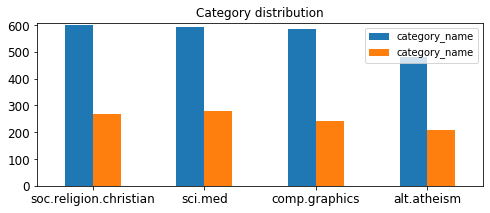

In [8]:
### >>> **Exercise 8 (take home):** 
upper_bound = max(X.category_name.value_counts()) + 10

# plot barchart for X_sample
pd.concat((X.category_name.value_counts(), X_sample.category_name.value_counts()), axis=1, sort=False).plot(kind = 'bar',
                                           legend=True,
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [10]:
### **>>> Exercise 10 (take home):**
import numpy as np

loc = X_counts[4, 0:100].toarray()[0]
for ones in np.where(loc == 1)[0]:
    print(count_vect.get_feature_names()[ones])

00
01


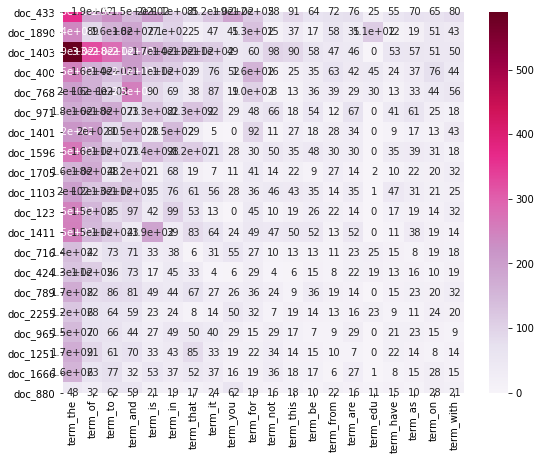

In [11]:
### **>>> Exercise 11 (take home):** 
import seaborn as sns
'''
Since a heatmap of too many elements is generally impossible to read, one choice is to use scatter plot.
However scatter plots can not represent the term frequency in the document.
So another way is to carefully select the documents / term to show.
Here I naively select to show the most frequent N terms and the top N documents that contains the most words.
'''

# plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]
# plot_y = ["doc_"+ str(i) for i in list(X.index)]
# plot_z = X_counts.toarray()

ind_x = np.argsort(X_counts.toarray().sum(axis=0))[::-1][:20]
ind_y = np.argsort(X_counts.toarray().sum(axis=1))[::-1][:20]

plot_x = ["term_"+str(i) for i in np.array(count_vect.get_feature_names())[ind_x]]
plot_y = ["doc_"+ str(i) for i in np.array(list(X.index))[ind_y]]
plot_z = X_counts.toarray()
plot_z = plot_z[ind_y, :]
plot_z = plot_z[:, ind_x]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=np.amin(plot_z), vmax=np.amax(plot_z), annot=True)



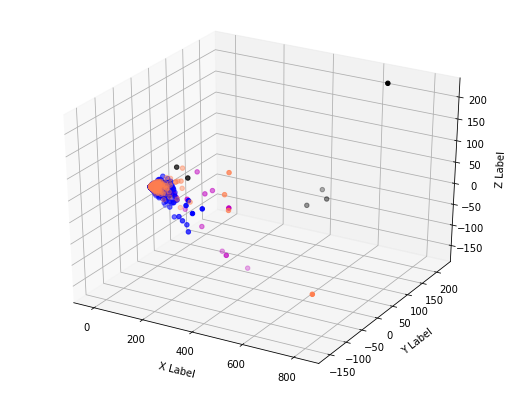

In [12]:
### >>> Exercise 12 (take home):
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (9,7))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [13]:
### >>> **Exercise 13 (take home):**
import plotly.express as px

term_frequencies = X_counts.toarray().sum(axis=0)

fig = px.bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])
fig.show()

In [14]:
### >>> **Exercise 14 (take home):** 
thresh = np.where(term_frequencies[:300] > 50)
feat_names = np.array(count_vect.get_feature_names()[:300])
fig = px.bar(x=feat_names[thresh], 
            y=term_frequencies[thresh])
fig.show()

In [15]:
### >>> **Exercise 15 (take home):** 
fig.update_xaxes(categoryorder="total descending")

In [16]:
### >>> **Exercise 16 (take home):**
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Part 2 + 3

In [17]:
def load_data(path):
    data = []

    with open(path, 'r', encoding="utf-8") as f:
        lines = f.readlines()
        for line in lines:
            text_, label_ = line.split('\t')
            data.append({
                'sentence': text_,
                'score': label_.rstrip()
            })
    
    return data

data = load_data("sentiment labelled sentences/amazon_cells_labelled.txt")
data += load_data("sentiment labelled sentences/imdb_labelled.txt")
data += load_data("sentiment labelled sentences/yelp_labelled.txt")

df = pd.DataFrame(data)

In [18]:
# check missing data
df.isnull().sum()

sentence    0
score       0
dtype: int64

In [19]:
# check duplicated data
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [20]:
df.sample(n=5)

,sentence,score
2385,I don't recommend unless your car breaks down ...,0
2800,I'm super pissd.,0
374,Not a good item.. It worked for a while then s...,0
294,The voice recognition thru the handset is exce...,1
2251,There is nothing privileged about working/eati...,0


In [21]:
from sklearn.model_selection import train_test_split

# split the data to test / train split first so don't need to process again in Part 3
X_train, X_test, y_train, y_test = train_test_split(df['sentence'], df['score'], test_size=0.2, random_state=0)

# create term frequency features
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_train).toarray()
X_test_counts = count_vect.transform(X_test).toarray()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create tf-idf features
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vect.transform(X_test).toarray()

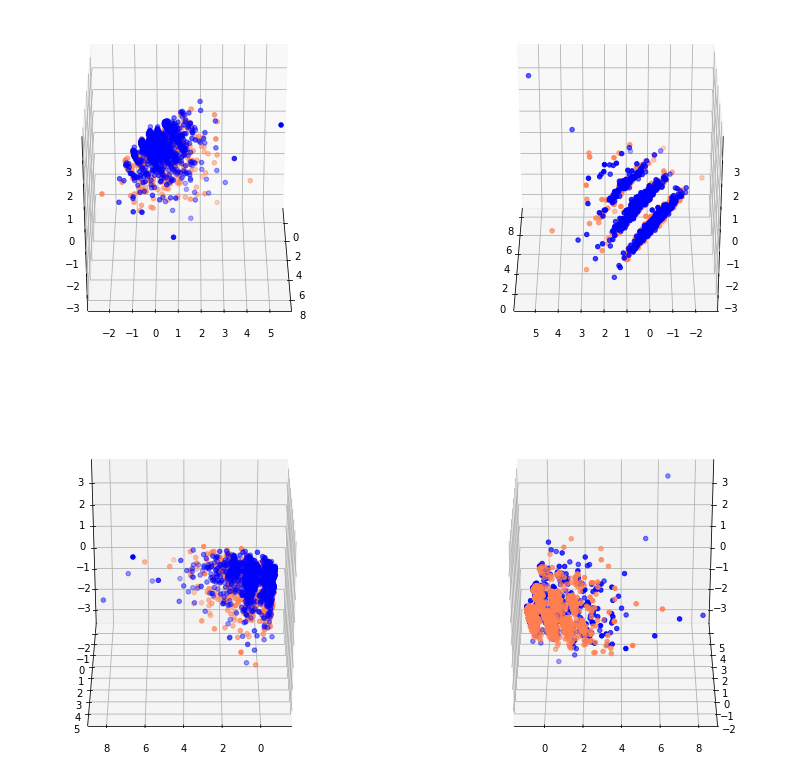

In [23]:
# data visualization using PCA
X_reduced = PCA(n_components = 3).fit_transform(count_vect.transform(df['sentence']).toarray())

fig, ax = plt.subplots(2, 2, figsize = (14,14), subplot_kw={'projection': '3d'})

ax[0][0].azim = 0
ax[1][0].azim = 90
ax[0][1].azim = 180
ax[1][1].azim = 270

for c, s in zip(['coral', 'blue'], ['0', '1']):
    xs = X_reduced[df['score'] == s].T[0]
    ys = X_reduced[df['score'] == s].T[1]
    zs = X_reduced[df['score'] == s].T[2]
   
    ax[0][0].scatter(xs, ys, zs, c = c, marker='o')
    ax[1][0].scatter(xs, ys, zs, c = c, marker='o')
    ax[0][1].scatter(xs, ys, zs, c = c, marker='o')
    ax[1][1].scatter(xs, ys, zs, c = c, marker='o')

plt.show()
# seems like the data is somehow separable

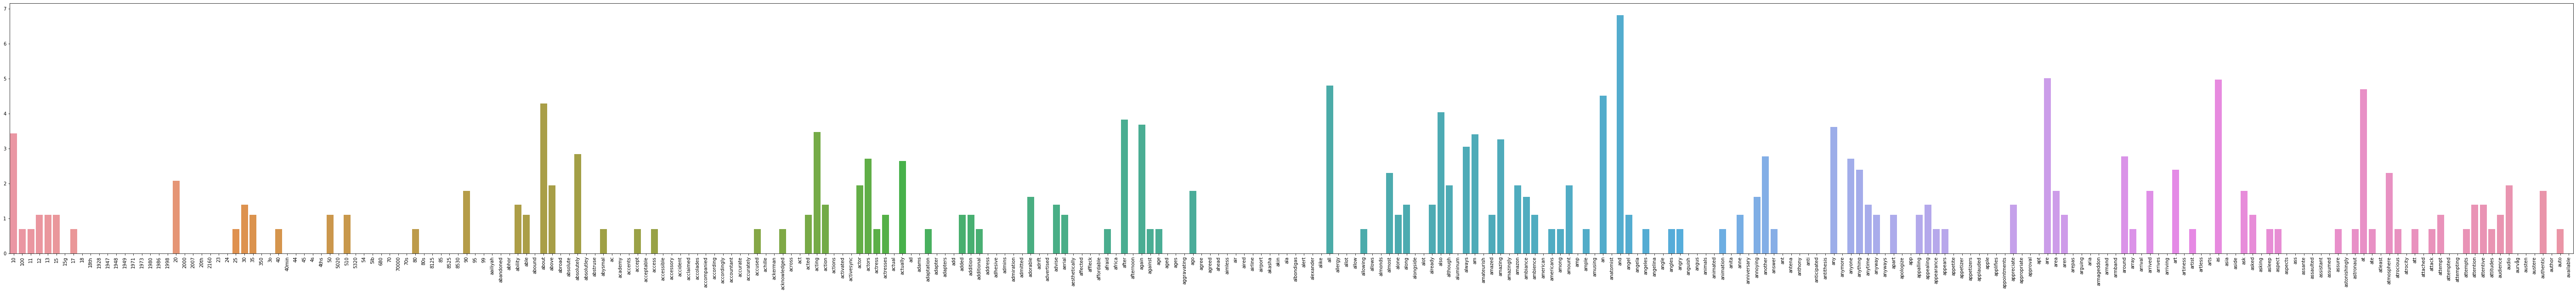

In [24]:
# data visualization
term_frequencies = np.log(X_counts.sum(axis=0))

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

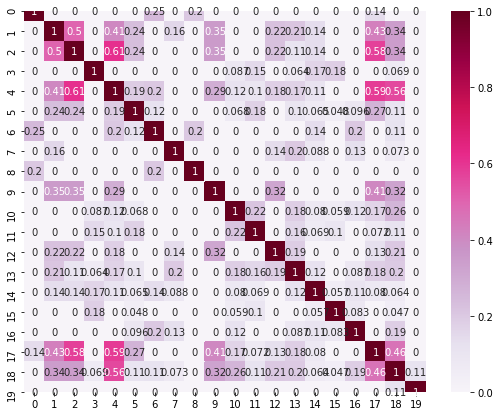

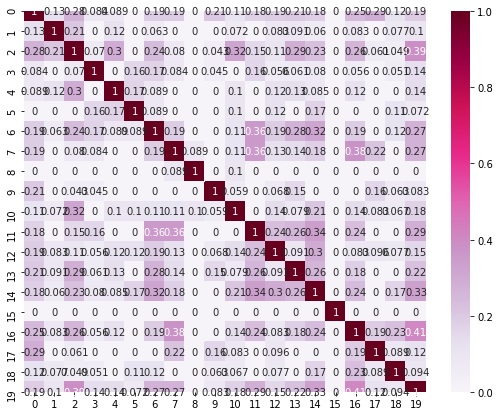

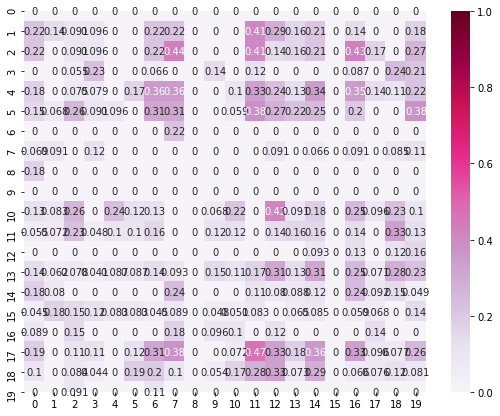

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

cv = count_vect.transform(df['sentence']).toarray()
sentence_pos = cv[df['score'] == '1']
sentence_neg = cv[df['score'] == '0']

# Cosine Similarity of sentence pairs of positive labels
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(cosine_similarity(sentence_pos[:20], sentence_pos[:20], dense_output=True),
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

# Cosine Similarity of sentence pairs of negative labels
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(cosine_similarity(sentence_neg[:20], sentence_neg[:20], dense_output=True),
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

# Cosine Similarity of sentence pairs of positive and negative labels
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(cosine_similarity(sentence_pos[:20], sentence_neg[:20], dense_output=True),
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

In [39]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression

# BernoulliNB classifier
clf_count = BernoulliNB(binarize=0.0)
clf_count.fit(X_counts, y_train)
print('[BernoulliNB score by tf] %.3f' % clf_count.score(X_test_counts, y_test))

clf_tfidf = BernoulliNB(binarize=0.0)
clf_tfidf.fit(X_tfidf, y_train)
print('[BernoulliNB score by tf-idf] %.3f' % clf_tfidf.score(X_test_tfidf, y_test))

# MultinomialNB classifier
clf_count = MultinomialNB()
clf_count.fit(X_counts, y_train)
print('[MultinomialNB score by tf] %.3f' % clf_count.score(X_test_counts, y_test))

clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_tfidf, y_train)
print('[MultinomialNB score by tf-idf] %.3f' % clf_tfidf.score(X_test_tfidf, y_test))

# GaussianNB classifier
clf_count = GaussianNB()
clf_count.fit(X_counts, y_train)
print('[GaussianNB score by tf] %.3f' % clf_count.score(X_test_counts, y_test))

clf_tfidf = GaussianNB()
clf_tfidf.fit(X_tfidf, y_train)
print('[GaussianNB score by tf-idf] %.3f' % clf_tfidf.score(X_test_tfidf, y_test))

# Theoretically, using the tf-idf features over term-frequency should yield better
# results since tf-idf accounts of terms that occur frequently accross all documents
# by lowering their weight and thus favor toward frequently occuring terms in
# respective documents. However the results is either comparable or only has a small
# improvement. There are some reasons that this may occur: First, though tf-idf should
# have great help in reducing the effects of stop-words (e.g. a, the, and), it might 
# also lower the weight of some words that might indicate a positive/negative label.
# BernoulliNB here with binarize = 0.0 essentially makes tf equal to tf-idf unless 
# a word occurs in all documents, however it gives the highest score. GaussianNB 
# shows improvement when using the tf-idf features but the score is very low. 
# In MultinomialNB the score of tf-idf features is even slightly worse. It doesn't
# mean that tf-idf is a bad feature, however, it might not suit this task well.

[BernoulliNB score by tf] 0.829
[BernoulliNB score by tf-idf] 0.829
[MultinomialNB score by tf] 0.824
[MultinomialNB score by tf-idf] 0.817
[GaussianNB score by tf] 0.652
[GaussianNB score by tf-idf] 0.683


# Part 4

Many words that appear most frequently are words that are meaningless such as the, as, is ... etc.
This can be addressed by defining the so-called "stop words", to filter out these words in the preprocessing stage.\
Also, plotting the term-count heatmap does not seem so meaningful, especially when the dataset is huge. On the other hand, this does not give us any information we are interested in, such as which words represents some category/class the most ... etc.
